![AES_519 Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/AES_519_Masthead.png)
# Exploring XArray

## Intro

What Pandas is to 2-D Tables, [Xarray](http://xarray.pydata.org/en/stable/) is to Multi-Dimensional data.

Xarray also has the things that many of us have taken for granted with our prefered tools for scientific datasets, especially in meteorology (I'm talking about [NCAR Command Language](https://www.ncl.ucar.edu)).  

When you crack open gridded meteorology data files, be they NetCDF, GRIB, HDF, etc.  We expect to see attributes like coordinates, units, descriptions, etc, and we build libraries and tools accordingly.  

Here we will look at Python's tool for this, Xarray.

We will NOT be looking at MetPy yet.  We'll just be looking at the basic structures of the data model.


## Loading the Libraries

Let's start by loading up a set of libraries that we'll be working with today.

*  [NumPy](https://numpy.org): our library source arrays, matrices, and high-level math functions.
*  [Matplotlib](https://matplotlib.org): our 2-d plotting library.  

and some new ones:

* [Xarray](http://xarray.pydata.org/en/stable/): N-D labeled arrays and datasets in Python
  
You should have these new ones but if not... try this in the notebook command pair.  (That second shell command should activate the qgrid from last time.)

```
import sys as sys
!{sys.executable} -m pip install cartopy metpy xarray qgrid netCDF4
!jupyter nbextension enable --py --sys-prefix qgrid

```
   


In [1]:
##########################################################
#
# Library Calls.
#

# loading numpy

import numpy             as np

# loading matplotlib

import matplotlib.pyplot as plt

# loading xarray

import xarray             as xr

 
#
##########################################################

## Let's pick a file!

In our threads server there is a file that should give us some fun.

This is a GEFS Global File for 0-24 hrs (or if you have a good connection 6-84 hrs( for all 21 members.

Be aware that our thredds server does not play nice all the time with our bigger data sets.  Therefore you may need to download these files locally.

Short Game: 

[http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/CLASS_Examples/catalog.html?dataset=xarray_gefs_temp2m_zisobaric_F06
-F24.nc](http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/CLASS_Examples/catalog.html?dataset=xarray_gefs_temp2m_zisobaric_F06-F24.nc)

Long: Game

[http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/CLASS_Examples/catalog.html?dataset=xarray_gefs_temp2m_zisobaric_F06
-F84.nc](http://kyrill.ias.sdsmt.edu:8080/thredds/catalog/CLASS_Examples/catalog.html?dataset=xarray_gefs_temp2m_zisobaric_F06-F84.nc)

The OPeNDAP address for it is:

http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/CLASS_Examples/xarray_gefs_temp2m_zisobaric_F06-F24.nc

or for the longer game... 

http://kyrill.ias.sdsmt.edu:8080/thredds/dodsC/CLASS_Examples/xarray_gefs_temp2m_zisobaric_F06-F84.nc


To "touch" (access the metadata but not extract anything) we can use the following command, [xarray.open_dataset()](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html).  Printing the object will drop the metadata for the file.

In [2]:
##########################################################
#
# Touching our GRIB File
#

gens_file = "~/Downloads/xarray_gefs_temp2m_zisobaric_F06-F84.nc"

ds = xr.open_dataset(gens_file)

display(ds)

#
##########################################################

<xarray.Dataset>
Dimensions:                              (ens: 21, height_above_ground: 1, isobaric3: 11, lat: 181, lon: 360, time: 14)
Coordinates:
  * ens                                  (ens) int32 0 1 2 3 4 ... 17 18 19 20
  * height_above_ground                  (height_above_ground) float32 2.0
  * isobaric3                            (isobaric3) float32 1000.0 ... 100000.0
  * lat                                  (lat) float32 90.0 89.0 ... -89.0 -90.0
  * lon                                  (lon) float32 0.0 1.0 ... 358.0 359.0
  * time                                 (time) datetime64[ns] 2018-10-25T18:...
Data variables:
    Geopotential_height_isobaric_ens     (time, ens, isobaric3, lat, lon) float32 ...
    Temperature_height_above_ground_ens  (time, ens, height_above_ground, lat, lon) float32 ...
Attributes:
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    history:                                                                 ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...
    NCO:                                                                     ...

Accessing the file is fairly easy.  Also if you pull the time data it will acutally translate it from "days from" to Pythonese dates.  As with Pandas, you need to use a tail object ".values" to just get the numbers.

Also when printing the dataset and datavariable detailed metadata in Jupyter... use the display() command.  It'll be prettier than print().

In [3]:
##########################################################
#
# Exploring the Time Variable
#


#
##########################################################



--- Time Variable ---



<xarray.DataArray 'time' (time: 14)>
array(['2018-10-25T18:00:00.000000000', '2018-10-26T00:00:00.000000000',
       '2018-10-26T06:00:00.000000000', '2018-10-26T12:00:00.000000000',
       '2018-10-26T18:00:00.000000000', '2018-10-27T00:00:00.000000000',
       '2018-10-27T06:00:00.000000000', '2018-10-27T12:00:00.000000000',
       '2018-10-27T18:00:00.000000000', '2018-10-28T00:00:00.000000000',
       '2018-10-28T06:00:00.000000000', '2018-10-28T12:00:00.000000000',
       '2018-10-28T18:00:00.000000000', '2018-10-29T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2018-10-25T18:00:00 2018-10-26 ... 2018-10-29
Attributes:
    standard_name:        time
    long_name:            GRIB forecast or observation time
    _CoordinateAxisType:  Time


--- Time Variable's Values ---

['2018-10-25T18:00:00.000000000' '2018-10-26T00:00:00.000000000'
 '2018-10-26T06:00:00.000000000' '2018-10-26T12:00:00.000000000'
 '2018-10-26T18:00:00.000000000' '2018-10-27T00:00:00.000000000'
 '2018-10-27T06:00:00.000000000' '2018-10-27T12:00:00.000000000'
 '2018-10-27T18:00:00.000000000' '2018-10-28T00:00:00.000000000'
 '2018-10-28T06:00:00.000000000' '2018-10-28T12:00:00.000000000'
 '2018-10-28T18:00:00.000000000' '2018-10-29T00:00:00.000000000']





--- Isobaric Level Variable ---



<xarray.DataArray 'isobaric3' (isobaric3: 11)>
array([  1000.,   5000.,  10000.,  20000.,  25000.,  30000.,  50000.,  70000.,
        85000.,  92500., 100000.], dtype=float32)
Coordinates:
  * isobaric3  (isobaric3) float32 1000.0 5000.0 10000.0 ... 92500.0 100000.0
Attributes:
    units:                   Pa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down


--- Isobaric Level Variable's Values ---

[  1000.   5000.  10000.  20000.  25000.  30000.  50000.  70000.  85000.
  92500. 100000.]





Let's also get a 3D+T+E field: Isobaric Height.  Be patient here if you are off campus or on pokey wireless.  And don't try to get the values like before...

In [4]:
##########################################################
#
# Extracting the Isobaric Height Fields
#



#
##########################################################


--- Z Isobaric Variable ---


<xarray.DataArray 'Geopotential_height_isobaric_ens' (time: 14, ens: 21, isobaric3: 11, lat: 181, lon: 360)>
[210727440 values with dtype=float32]
Coordinates:
  * ens        (ens) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * isobaric3  (isobaric3) float32 1000.0 5000.0 10000.0 ... 92500.0 100000.0
  * lat        (lat) float32 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time       (time) datetime64[ns] 2018-10-25T18:00:00 ... 2018-10-29
Attributes:
    long_name:                      Geopotential height @ Isobaric surface
    units:                          gpm
    abbreviation:                   HGT
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-3-5_L100
    Grib2_Parameter:                [0 3 5]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Geopotential height
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Ensemble forecast

In [5]:
##########################################################
#
# Extracting the 2-M Air Temperature Fields
#



#
##########################################################


--- T2m Variable ---


<xarray.DataArray 'Temperature_height_above_ground_ens' (time: 14, ens: 21, height_above_ground: 1, lat: 181, lon: 360)>
[19157040 values with dtype=float32]
Coordinates:
  * ens                  (ens) int32 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * height_above_ground  (height_above_ground) float32 2.0
  * lat                  (lat) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * lon                  (lon) float32 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * time                 (time) datetime64[ns] 2018-10-25T18:00:00 ... 2018-1...
Attributes:
    long_name:                      Temperature @ Specified height level abov...
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-0-0_L103
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               103
    Grib2_Level_Desc:               Specified height level above ground
    Grib2_Generating_Process_Type:  Ensemble forecast

## Getting Fussy with the Data You Want

The best part here is like other tools like NCL, you can specify layers in two fashions using "select" operators.

* Get the layers or slices you want using the index numbers [xarray.DataArray.isel](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.isel.html)
* Get the layers or slices you want using the *coordinate* [xarray.DataArray.sel](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sel.html)

(guess which one I prefer)

Note that once you start pulling the data as values, the more crunching time it will take.  You want to reach and pull as little data at once as possible and take only what you need.


In [6]:
##########################################################
#
# Extracting one field
#


#
##########################################################

<xarray.DataArray 'Temperature_height_above_ground_ens' (time: 14, ens: 21, height_above_ground: 1)>
array([[[291.4 ],
        [291.2 ],
        ...,
        [291.2 ],
        [291.4 ]],

       [[287.6 ],
        [287.63],
        ...,
        [287.62],
        [287.63]],

       ...,

       [[285.45],
        [285.73],
        ...,
        [288.16],
        [284.89]],

       [[283.95],
        [286.86],
        ...,
        [286.1 ],
        [281.13]]], dtype=float32)
Coordinates:
  * ens                  (ens) int32 0 1 2 3 4 5 6 7 ... 13 14 15 16 17 18 19 20
  * height_above_ground  (height_above_ground) float32 2.0
    lat                  float32 44.0
    lon                  float32 257.0
  * time                 (time) datetime64[ns] 2018-10-25T18:00:00 ... 2018-1...
Attributes:
    long_name:                      Temperature @ Specified height level abov...
    units:                          K
    abbreviation:                   TMP
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-0-0_L103
    Grib2_Parameter:                [0 0 0]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Temperature
    Grib2_Parameter_Name:           Temperature
    Grib2_Level_Type:               103
    Grib2_Level_Desc:               Specified height level above ground
    Grib2_Generating_Process_Type:  Ensemble forecast

[[[291.4 ]
  [291.2 ]
  [291.1 ]
  [292.26]
  [291.  ]
  [291.5 ]
  [291.7 ]
  [291.9 ]
  [291.4 ]
  [290.99]
  [291.8 ]
  [291.2 ]
  [290.97]
  [291.45]
  [291.  ]
  [291.44]
  [291.52]
  [291.23]
  [291.1 ]
  [291.2 ]
  [291.4 ]]

 [[287.6 ]
  [287.63]
  [287.31]
  [288.36]
  [287.41]
  [287.6 ]
  [287.74]
  [287.99]
  [287.49]
  [287.51]
  [287.88]
  [287.35]
  [287.46]
  [287.46]
  [287.36]
  [287.63]
  [287.51]
  [287.83]
  [287.55]
  [287.62]
  [287.63]]

 [[283.06]
  [283.01]
  [282.55]
  [283.59]
  [283.1 ]
  [283.48]
  [282.68]
  [283.45]
  [283.  ]
  [283.13]
  [282.82]
  [283.85]
  [282.68]
  [283.26]
  [282.46]
  [283.44]
  [283.18]
  [282.86]
  [283.52]
  [282.74]
  [282.71]]

 [[282.05]
  [281.49]
  [282.09]
  [282.33]
  [281.8 ]
  [281.9 ]
  [282.2 ]
  [282.09]
  [281.98]
  [281.74]
  [281.81]
  [282.85]
  [281.37]
  [282.21]
  [281.98]
  [281.93]
  [282.41]
  [282.01]
  [282.21]
  [281.78]
  [281.89]]

 [[289.83]
  [289.9 ]
  [289.82]
  [289.41]
  [289.6 ]
  [289.1 ]
  

<xarray.DataArray 'Geopotential_height_isobaric_ens' (ens: 21, lat: 181, lon: 360)>
[1368360 values with dtype=float32]
Coordinates:
  * ens        (ens) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
    isobaric3  float32 50000.0
  * lat        (lat) float32 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    time       datetime64[ns] 2018-10-26T12:00:00
Attributes:
    long_name:                      Geopotential height @ Isobaric surface
    units:                          gpm
    abbreviation:                   HGT
    grid_mapping:                   LatLon_Projection
    Grib_Variable_Id:               VAR_0-3-5_L100
    Grib2_Parameter:                [0 3 5]
    Grib2_Parameter_Discipline:     Meteorological products
    Grib2_Parameter_Category:       Mass
    Grib2_Parameter_Name:           Geopotential height
    Grib2_Level_Type:               100
    Grib2_Level_Desc:               Isobaric surface
    Grib2_Generating_Process_Type:  Ensemble forecast

## Processing: Example of dimensional reduction

This is ensemble data so let's fetch some summary information (the mean and standard deviation values across the members).

This can be done with [xarray.DataArray.mean](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html) and [xarray.DataArray.std](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.std.html#xarray.Dataset.std)

In [8]:
##########################################################
#
# Calculating Statistics over a "slice" (ens)
#





#
##########################################################

<xarray.DataArray 'Temperature_height_above_ground_ens' (time: 14, height_above_ground: 1)>
array([[291.36954],
       [287.61523],
       [283.07477],
       [282.0057 ],
       [289.87714],
       [287.77332],
       [284.54288],
       [283.55478],
       [290.6962 ],
       [287.1062 ],
       [280.89667],
       [278.04474],
       [285.4143 ],
       [283.67856]], dtype=float32)
Coordinates:
  * height_above_ground  (height_above_ground) float32 2.0
    lat                  float32 44.0
    lon                  float32 257.0
  * time                 (time) datetime64[ns] 2018-10-25T18:00:00 ... 2018-1...

<xarray.DataArray 'Temperature_height_above_ground_ens' (time: 14, height_above_ground: 1)>
array([[0.3273622 ],
       [0.23795743],
       [0.37054604],
       [0.31035617],
       [0.3102396 ],
       [0.76549697],
       [0.81622916],
       [0.5772896 ],
       [1.3638076 ],
       [1.6507769 ],
       [1.1933033 ],
       [0.77039456],
       [1.2906638 ],
       [1.8706973 ]], dtype=float32)
Coordinates:
  * height_above_ground  (height_above_ground) float32 2.0
    lat                  float32 44.0
    lon                  float32 257.0
  * time                 (time) datetime64[ns] 2018-10-25T18:00:00 ... 2018-1...

<xarray.DataArray 'Geopotential_height_isobaric_ens' (lat: 181, lon: 360)>
array([[5350.4517, 5350.4517, 5350.4517, ..., 5350.4517, 5350.4517,
        5350.4517],
       [5357.5557, 5357.1353, 5356.7163, ..., 5358.797 , 5358.387 ,
        5357.9746],
       [5363.259 , 5362.466 , 5361.6724, ..., 5365.613 , 5364.8315,
        5364.048 ],
       ...,
       [5066.6514, 5066.0337, 5065.421 , ..., 5068.5244, 5067.8975,
        5067.273 ],
       [5077.8247, 5077.5435, 5077.27  , ..., 5078.6836, 5078.3936,
        5078.1055],
       [5086.3916, 5086.3916, 5086.3916, ..., 5086.3916, 5086.3916,
        5086.3916]], dtype=float32)
Coordinates:
    isobaric3  float32 50000.0
  * lat        (lat) float32 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    time       datetime64[ns] 2018-10-26T12:00:00

<xarray.DataArray 'Geopotential_height_isobaric_ens' (lat: 181, lon: 360)>
array([[4.769511 , 4.769511 , 4.769511 , ..., 4.769511 , 4.769511 ,
        4.769511 ],
       [4.467054 , 4.4629474, 4.459506 , ..., 4.4779983, 4.4733543,
        4.4697514],
       [4.327453 , 4.32267  , 4.3138638, ..., 4.3556757, 4.3499274,
        4.3396754],
       ...,
       [9.276309 , 9.195573 , 9.1129875, ..., 9.487696 , 9.423647 ,
        9.351368 ],
       [9.048685 , 9.048981 , 9.046051 , ..., 9.043535 , 9.045322 ,
        9.047962 ],
       [8.475187 , 8.475187 , 8.475187 , ..., 8.475187 , 8.475187 ,
        8.475187 ]], dtype=float32)
Coordinates:
    isobaric3  float32 50000.0
  * lat        (lat) float32 90.0 89.0 88.0 87.0 ... -87.0 -88.0 -89.0 -90.0
  * lon        (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    time       datetime64[ns] 2018-10-26T12:00:00

## Plotting

Here we can start with a very simple plot...  Let's to a plot of our temperature

[291.6969  287.85318 283.4453  282.31607 290.18738 288.53882 285.3591
 284.13208 292.06    288.757   282.08997 278.81512 286.70496 285.54926]


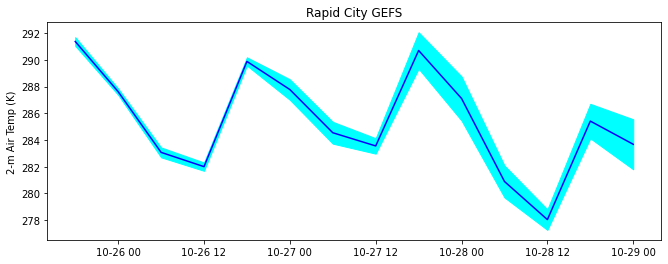

In [20]:
##########################################################
#
# Simple Hi-Lo plot
#




#
##########################################################

Or mapping out our 500-mb Chart is done with the plt.contour and plt.contourf functions. 

Note the use of the a-range function to create a 120-m spacing.

You can use a color map of your choice found here.  https://matplotlib.org/3.3.2/gallery/color/colormap_reference.html

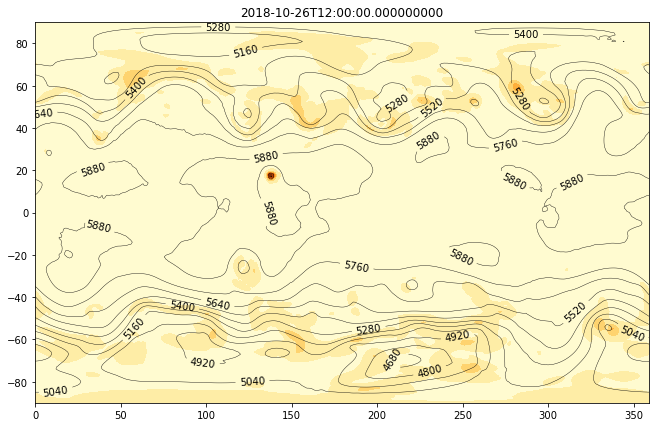

In [26]:
###################################################
#
# Plain Contour Plot for 500-hPa
#


#
###################################################

Next Time... Better put a map on it!

# Version Information

In [ ]:
################################################################
#
# Loading Version Information
#

%load_ext version_information

%version_information version_information, numpy, sympy, scipy, matplotlib

#
################################################################